# Setup
Make sure to run jupyter from the location where this notebook is located so paths work correctly.

This repo contains a copy of the Mask_RCNN code. Originally this was obtained by cloning the dataset using:

```
git clone https://github.com/matterport/Mask_RCNN.git
```

See the above repository for more information.

Setup:

```
cd Mask_RCNN
python setup.py install
pip show mask-rcnn
```

Download project weights (246mb) to your current working directory:

https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

## Inference
We will show how to use Mask RCNN to locate objects within an image. Example based upon: https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/

In [1]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)

Using TensorFlow backend.
W0708 10:05:43.265915 25924 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 10:05:43.311697 25924 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 10:05:43.322632 25924 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 10:05:43.380889 25924 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1

In [2]:
# load photograph
img = load_img('boat.png')
img = img_to_array(img)

In [3]:
# make prediction
results = rcnn.detect([img], verbose=0)

In [4]:
print(results)

[{'rois': array([[128, 100, 465, 595],
       [114,   0, 138,  62],
       [126, 321, 141, 365],
       [ 91, 155, 128, 201],
       [156, 255, 174, 278],
       [ 54, 351, 142, 411],
       [ 91,  53, 132,  98],
       [179, 133, 187, 162],
       [ 65, 323, 138, 366],
       [106, 211, 128, 284],
       [174, 166, 183, 184]]), 'class_ids': array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), 'scores': array([0.9995222 , 0.9209113 , 0.8981745 , 0.89637977, 0.87862086,
       0.8546243 , 0.8416052 , 0.8323974 , 0.82312757, 0.8169852 ,
       0.71960706], dtype=float32), 'masks': array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [Fa

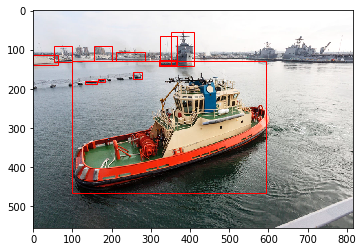

In [5]:
# visualize the results
draw_image_with_boxes('boat.png', results[0]['rois'])

In [6]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

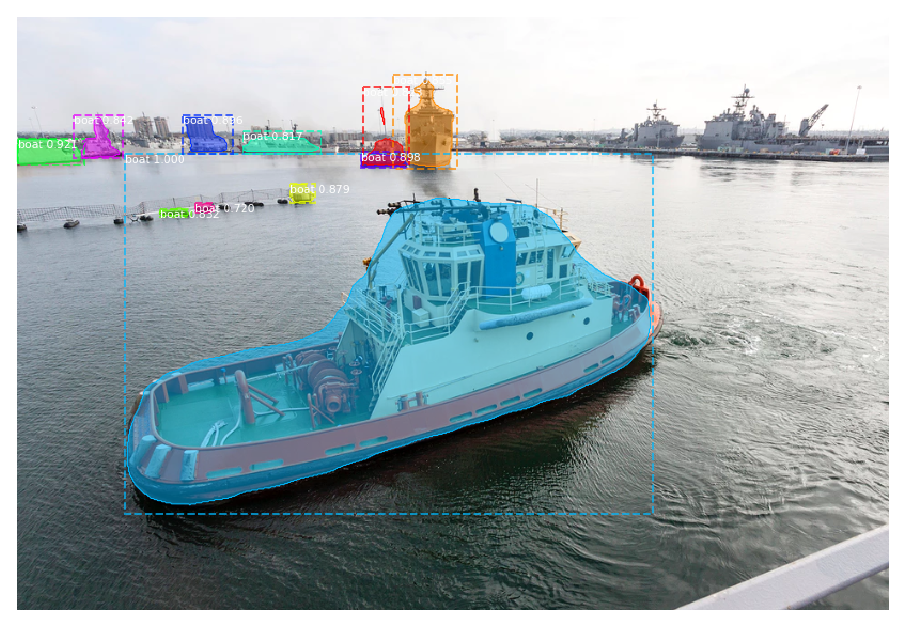

In [7]:
from mrcnn.visualize import display_instances

# get dictionary for first prediction
r = results[0]
# use MsakRCNN funtion to show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

# Training

Based upon: https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/

This repo contains a copy of the training images and annotations under the kangaroo folder. Originally this was obtained by cloning the dataset using:

```
git clone https://github.com/experiencor/kangaroo.git
```

This gives us an images folder and a folder annots that contains xml files with information on bounding boxes. The filename can be used to associate the two files. 

We can look at the contents of one of the files to see what information about bounding boxes looks like:

In [15]:
with open('kangaroo/annots/00001.xml', 'r') as f:
    print(f.read())

<annotation>
	<folder>Kangaroo</folder>
	<filename>00001.jpg</filename>
	<path>/home/andy/Desktop/Kangaroo/stock-photo-two-kids-in-the-zoo-feeding-kangaroo-296180786.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>450</width>
		<height>319</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>kangaroo</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>233</xmin>
			<ymin>89</ymin>
			<xmax>386</xmax>
			<ymax>262</ymax>
		</bndbox>
	</object>
	<object>
		<name>kangaroo</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>134</xmin>
			<ymin>105</ymin>
			<xmax>341</xmax>
			<ymax>253</ymax>
		</bndbox>
	</object>
</annotation>



In [12]:
%pwd

'C:\\ComputerVision\\computer-vision-playground\\object-detection'

We can create code to read and parse these annotation files using xpath

In [17]:
# example of extracting bounding boxes from an annotation file
from xml.etree import ElementTree

# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
	# load and parse the file
	tree = ElementTree.parse(filename)
	# get the root of the document
	root = tree.getroot()
	# extract each bounding box
	boxes = list()
	for box in root.findall('.//bndbox'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	# extract image dimensions
	width = int(root.find('.//size/width').text)
	height = int(root.find('.//size/height').text)
	return boxes, width, height

# extract details form annotation file
boxes, w, h = extract_boxes('kangaroo/annots/00001.xml')

# summarize extracted details
print("Size:", w, h)
print("Bounding boxes:", boxes)

Size: 450 319
Bounding boxes: [[233, 89, 386, 262], [134, 105, 341, 253]]


The mask-rcnn library requires that train, validation, and test datasets be managed by a mrcnn.utils.Dataset object so we need to create a new class that extends the mrcnn.utils.Dataset class and override two functions, one for loading a mask called load_mask() and one for loading an image reference (path or URL) called image_reference().

We use the Dataset add_class() function to add new classes for detection and the add_image() function for adding information about new images for detection to a 'dictionaty of images'.

We have 160 images, and will use the filename to define a train / test split (note the numbering is not sequential so this means we split on the id 150).

In [ ]:
# split into train and test set
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset

# class that defines and loads the kangaroo dataset
class KangarooDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
		# define one class
		self.add_class("dataset", 1, "kangaroo")
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annots/'
		# find all images
		for filename in listdir(images_dir):
			# extract image id
			image_id = filename[:-4]
			# skip bad images
			if image_id in ['00090']:
				continue
			# skip all images after 150 if we are building the train set
			if is_train and int(image_id) >= 150:
				continue
			# skip all images before 150 if we are building the test/val set
			if not is_train and int(image_id) < 150:
				continue
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height

	# load the masks for an image
	def load_mask(self, image_id):
        """Loading the mask for a given ‘image_id‘ where ‘image_id‘ is the integer index for an image
        in the dataset, assigned based on the order that the image was added via a call to add_image()
        when loading the dataset. The function must return an array of one or more masks for the photo
        associated with the image_id, and the classes for each mask.

        As we don’t have masks, but we do have bounding boxes. We can load the bounding boxes for a 
        given photo and return them as masks. The library will then infer bounding boxes from our 
        “masks” which will be the same size."""
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_ids.append(self.class_names.index('kangaroo'))
		return masks, asarray(class_ids, dtype='int32')

	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']

In [18]:
# train set
train_set = KangarooDataset()
train_set.load_dataset('kangaroo', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test/val set
test_set = KangarooDataset()
test_set.load_dataset('kangaroo', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 131
Test: 32


Verify that the above works

Image shape (319, 450, 3)
Masks shape: (319, 450, 2)


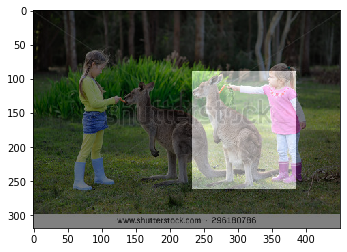

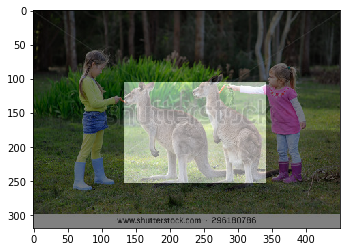

In [34]:
# load an image
image_id = 0
image = train_set.load_image(image_id)
print("Image shape", image.shape)

# load image mask
masks, class_ids = train_set.load_mask(image_id)
print("Masks shape:", masks.shape)

# show all masks
for j in range(masks.shape[2]):
    # plot image
    pyplot.imshow(image)
    # plot mask
    pyplot.imshow(masks[:, :, j], cmap='gray', alpha=0.5)
    pyplot.show()

Show for the first 9 images in the dataset.

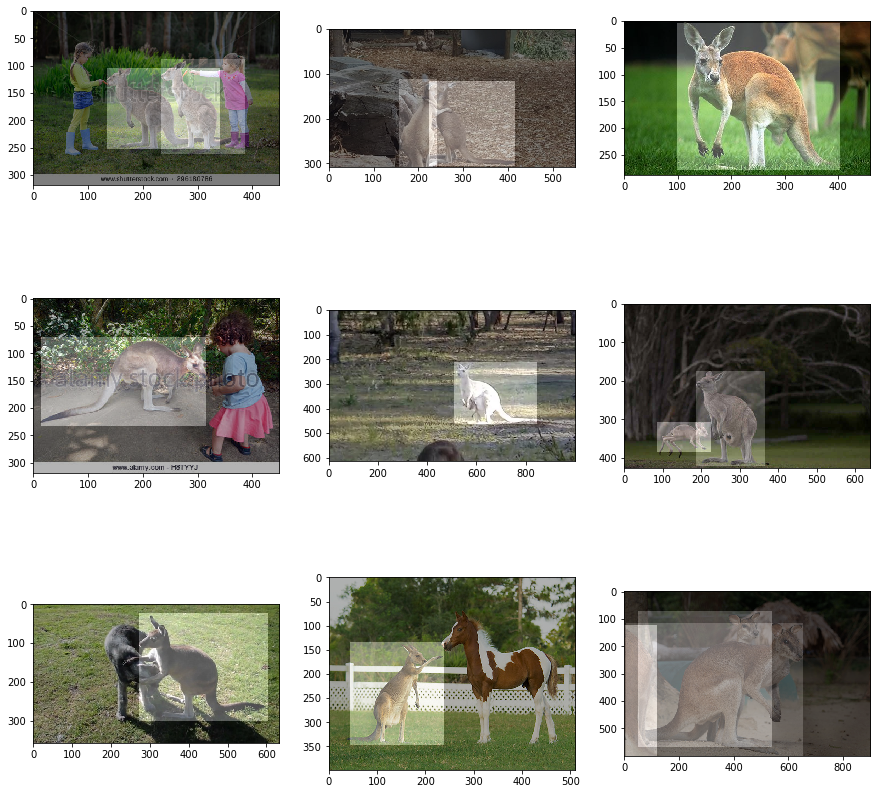

In [35]:
fig=pyplot.figure(figsize=(15, 15))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	image = train_set.load_image(i)
	pyplot.imshow(image)
	# plot all masks
	masks, _ = train_set.load_mask(i)
	for j in range(masks.shape[2]):
		pyplot.imshow(masks[:, :, j], cmap='gray', alpha=0.3)
        
# show the figure
pyplot.show()

We will verify the above code by looking at the image info for all images.

In [37]:
for image_id in train_set.image_ids:
	# load image info
	info = train_set.image_info[image_id]
	# display on the console
	print(info)

{'id': '00001', 'source': 'dataset', 'path': 'kangaroo/images/00001.jpg', 'annotation': 'kangaroo/annots/00001.xml'}
{'id': '00002', 'source': 'dataset', 'path': 'kangaroo/images/00002.jpg', 'annotation': 'kangaroo/annots/00002.xml'}
{'id': '00003', 'source': 'dataset', 'path': 'kangaroo/images/00003.jpg', 'annotation': 'kangaroo/annots/00003.xml'}
{'id': '00004', 'source': 'dataset', 'path': 'kangaroo/images/00004.jpg', 'annotation': 'kangaroo/annots/00004.xml'}
{'id': '00005', 'source': 'dataset', 'path': 'kangaroo/images/00005.jpg', 'annotation': 'kangaroo/annots/00005.xml'}
{'id': '00006', 'source': 'dataset', 'path': 'kangaroo/images/00006.jpg', 'annotation': 'kangaroo/annots/00006.xml'}
{'id': '00007', 'source': 'dataset', 'path': 'kangaroo/images/00007.jpg', 'annotation': 'kangaroo/annots/00007.xml'}
{'id': '00009', 'source': 'dataset', 'path': 'kangaroo/images/00009.jpg', 'annotation': 'kangaroo/annots/00009.xml'}
{'id': '00010', 'source': 'dataset', 'path': 'kangaroo/images/00

In [38]:
for image_id in test_set.image_ids:
	# load image info
	info = test_set.image_info[image_id]
	# display on the console
	print(info)

{'id': '00150', 'source': 'dataset', 'path': 'kangaroo/images/00150.jpg', 'annotation': 'kangaroo/annots/00150.xml'}
{'id': '00151', 'source': 'dataset', 'path': 'kangaroo/images/00151.jpg', 'annotation': 'kangaroo/annots/00151.xml'}
{'id': '00152', 'source': 'dataset', 'path': 'kangaroo/images/00152.jpg', 'annotation': 'kangaroo/annots/00152.xml'}
{'id': '00153', 'source': 'dataset', 'path': 'kangaroo/images/00153.jpg', 'annotation': 'kangaroo/annots/00153.xml'}
{'id': '00154', 'source': 'dataset', 'path': 'kangaroo/images/00154.jpg', 'annotation': 'kangaroo/annots/00154.xml'}
{'id': '00155', 'source': 'dataset', 'path': 'kangaroo/images/00155.jpg', 'annotation': 'kangaroo/annots/00155.xml'}
{'id': '00156', 'source': 'dataset', 'path': 'kangaroo/images/00156.jpg', 'annotation': 'kangaroo/annots/00156.xml'}
{'id': '00157', 'source': 'dataset', 'path': 'kangaroo/images/00157.jpg', 'annotation': 'kangaroo/annots/00157.xml'}
{'id': '00158', 'source': 'dataset', 'path': 'kangaroo/images/00

Finally we will use the mrcnn.visualize.display_instances() function to show a photograph with bounding boxes, masks, and class labels. We use the extract_bboxes() function to extract bounding boxes from the masks.

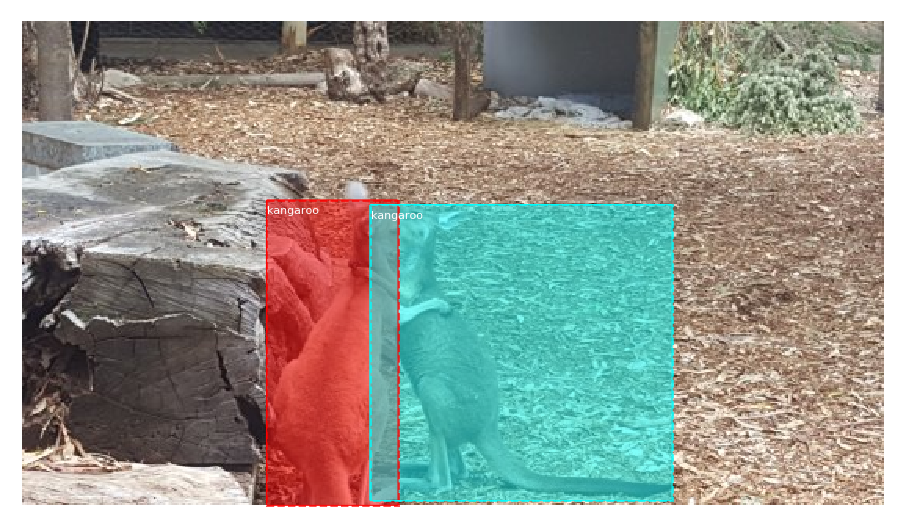

In [40]:
from mrcnn.utils import extract_bboxes

# define image id
image_id = 1
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

To train a model, we need a new class that extends the mrcnn.config.Config class and defines properties of both the prediction problem (such as name and the number of classes) and the algorithm for training the model (such as the learning rate).

The configuration must define the name of the configuration via the ‘NAME‘ attribute, e.g. ‘kangaroo_cfg‘, that will be used to save details and models to file during the run. The configuration must also define the number of classes in the prediction problem via the ‘NUM_CLASSES‘ attribute. In this case, we only have one object type of kangaroo, although there is always an additional class for the background.

Finally, we must define the number of samples (photos) used in each training epoch. This will be the number of photos in the training dataset, in this case, 131.

In [42]:
# define a configuration for the model
class KangarooConfig(Config):
	# Give the configuration a recognizable name
	NAME = "kangaroo_cfg"
	# Number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 1
	# Number of training steps per epoch
	STEPS_PER_EPOCH = 131

# prepare config
config = KangarooConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Next we create an instance of the class, load the weights and train the model.

When loading the weights, the class-specific output layers will be removed so that new output layers can be defined and trained. This can be done by specifying the ‘exclude‘ argument and listing all of the output layers to exclude or remove from the model after it is loaded. This includes the output layers for the classification label, bounding boxes, and masks.

Next, the model can be fit on the training dataset by calling the train() function and passing in both the training dataset and the validation dataset. We can also specify the learning rate as the default learning rate in the configuration (0.001).

We can also specify what layers to train. In this case, we will only train the heads, that is the output layers of the model.

We could follow this training with further epochs that fine-tune all of the weights in the model. This could be achieved by using a smaller learning rate and changing the ‘layer’ argument from ‘heads’ to ‘all’.

There are several train and test loss scores reported. As we are interested in object detection instead of object segmentation, the loss for the classification output on the train and validation datasets (e.g. mrcnn_class_loss and val_mrcnn_class_loss), as well as the loss for the bounding box output for the train and validation datasets (mrcnn_bbox_loss and val_mrcnn_bbox_loss) are probably the most relevant.

In [ ]:
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights('mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')

We get a mAP score to evaluate the model performance.

In [ ]:
# evaluate the mask rcnn model on the kangaroo dataset
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image

# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "kangaroo_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 1
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
		# load image, bounding boxes and masks for the image id
		image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)
		# extract results for first sample
		r = yhat[0]
		# calculate statistics, including AP
		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		# store
		APs.append(AP)
	# calculate the mean AP across all images
	mAP = mean(APs)
	return mAP

# create config
cfg = PredictionConfig()

# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)

# load (best) model weights
model.load_weights('mask_rcnn_kangaroo_cfg_0005.h5', by_name=True)

# evaluate model on training dataset
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)

# evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, cfg)
print("Test mAP: %.3f" % test_mAP)

Finally plot a sample of actual v's predicted images

In [ ]:
# plot a number of photos with ground truth and predictions
def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
    # load image and mask
    for i in range(n_images):
        # load the image and mask
        image = dataset.load_image(i)
        mask, _ = dataset.load_mask(i)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        # define subplot
        pyplot.subplot(n_images, 2, i*2+1)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Actual')
        # plot masks
        for j in range(mask.shape[2]):
            pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
        # get the context for drawing boxes
        pyplot.subplot(n_images, 2, i*2+2)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        # plot each box
        for box in yhat['rois']:
            # get coordinates
            y1, x1, y2, x2 = box
            # calculate width and height of the box
            width, height = x2 - x1, y2 - y1
            # create the shape
            rect = Rectangle((x1, y1), width, height, fill=False, color='red')
            # draw the box
            ax.add_patch(rect)
    # show the figure
    pyplot.show()
    
# plot predictions for train dataset
plot_actual_vs_predicted(train_set, model, cfg)
# plot predictions for test dataset
plot_actual_vs_predicted(test_set, model, cfg)